Get familiar with McSnow

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import sys
#import custom functions
sys.path.append('functions')
#from plotting_functions import plot1Dhist

In [3]:
#load asci with all timesteps and all SPs
allSPalltimesteps = np.loadtxt("/home/mkarrer/Dokumente/McSnow/MCSNOW/experiments/1d_xi100000_nz5000_lwc20_ncl0_dtc5_nrp30_rm10_rt2_vt2_h10-20_ba500/mass2fr.dat")

In [4]:
#TODO: divide timesteps
allSP = allSPalltimesteps

In [5]:
#read individual properties of the SPs
m_tot = allSP[:,0] #read mass of all particles
diam = allSP[:,9] #diameter
multipl = allSP[:,-1] #multiplicity

In [6]:
#define bins
n_bins = 100
d_bound_ds = np.logspace(-12,0,n_bins+1)
d_ds = d_bound_ds[:-1] + 0.5*np.diff(d_bound_ds)
d_counts = np.zeros(n_bins)
#get the number of particles (SP*multiplicity) at each bin
for i in range(0,n_bins):
    d_counts[i] = np.sum(np.where(np.logical_and(d_bound_ds[i]<diam,diam<d_bound_ds[i+1]),multipl,0))

In [7]:
def plotbar(x,counts,facecolor='blue',alpha=1, 
               xlabel='',ylabel='counts',title='',logflag=0,axlims=[0]):
    '''
    input: x-> x-axes of bar-plot of the histogram, counts-> corresponding counts to x-axis, facecolor, 
    alpha-> transparency value, xlabel,ylabel,title, logflag-> 0: no 1: logx 2:logy 3:loglog
    '''
    if logflag==1 or logflag==3:
        plt.xscale('log')
    if logflag==2 or logflag==3:
            logy=True
    else: logy=False
    
    # the histogram of the data
    plt.bar(x[:-1], counts[:-1], np.diff(x) , facecolor=facecolor, alpha=alpha, log=logy)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if len(axlims)==4:
        plt.axis(axlims)
    plt.grid(True)

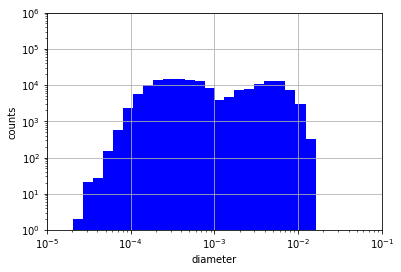

In [8]:
#for i in range(0,100):
#    print d_ds[i],d_counts[i]
plotbar(d_ds,d_counts,xlabel='diameter',logflag=3,axlims=[10**-5, 10**-1, 1, 10**6])

In [9]:
def plot1Dhist(x,bins,normed=1,facecolor='blue',alpha=1, 
               xlabel='',ylabel='counts',title='',logflag=0,axlims=[0]):
    '''
    input: x->main variable of the histogram, bins, normed-> normalize flag, number_of_bins, facecolor, 
    alpha-> transparency value, xlabel,ylabel,title, logflag-> 0: no 1: logx 2:logy 3:loglog
    '''
    if logflag==1 or logflag==3:
        plt.xscale('log')
    if logflag==2 or logflag==3:
            logy=True
    else: logy=False
    
    # the histogram of the data
    n, bins, patches = plt.hist(x, bins=bins, normed=normed, facecolor=facecolor, alpha=alpha, log=logy)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axis([10**-5, 1, 1, 10**6])
    if len(axlims)==4:
        plt.axis(axlims)
    plt.grid(True)

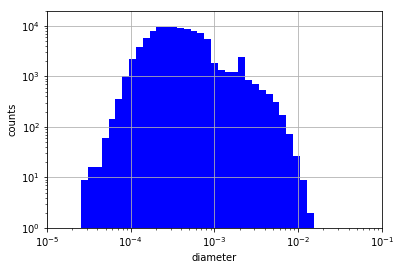

In [14]:
#plotting_functions.plot1Dhist(m_tot)
#print dir(),plt
plot1Dhist(diam,10**np.linspace(-5,-1),normed=0,xlabel="diameter",logflag=3,axlims=[10**-5, 10**-1, 1, 2*10**4])

In [11]:
!jupyter nbconvert --to script McSnow_tests.ipynb

[NbConvertApp] Converting notebook McSnow_tests.ipynb to script
[NbConvertApp] Writing 3009 bytes to McSnow_tests.py
